In [1]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [2]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [3]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [4]:
# moist['Time'].head()


In [5]:
moist = moist.set_index('Time')
# moist.head()


In [6]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-08 22:36:59,6.15625,20.5717,23
2019-06-08 22:38:00,6.12500,20.5704,23
2019-06-08 22:39:01,6.18750,20.5730,23
2019-06-08 22:40:02,6.12500,21.1204,23
2019-06-08 22:41:03,6.12500,20.6510,23


In [7]:
import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [8]:
# moist['2019-06-01 14:00':].Humidity.plot(legend=True)
# moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

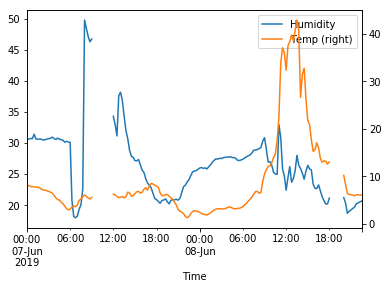

In [9]:
hourly = moist.resample('15Min').mean()
hourly['2019-06-07':].Humidity.plot(legend=True)
hourly['2019-06-07':].Temp.plot(secondary_y=True,legend=True)


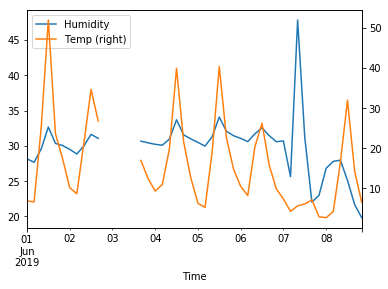

In [10]:
daily = moist.resample('4h').mean()
daily['2019-06':].Humidity.plot(legend=True)
daily['2019-06':].Temp.plot(secondary_y=True,legend=True)


In [11]:
submoist=moist['2019-06-06':]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
trendStart = submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()
# tf
# tf.Time.values.astype('float64')
# mt=tt.astype('timedelta64[m]')
tt1=tf.Time.values.astype('float64')
# tt1
mt=tt1.reshape(-1,1)
print(mt, mt.max())
mtmro=mt.max()+(24*3600)
print(mtmro.reshape(-1,1))
# mt=tt.to_pytimedelta
# print(mt.dtype,mt)
# print( m.dtype,m)

[[  6.10000000e+10]
 [  1.22000000e+11]
 [  1.82000000e+11]
 ..., 
 [  2.54294000e+14]
 [  2.54355000e+14]
 [  2.54416000e+14]] 2.54416e+14
[[  2.54416000e+14]]


In [12]:
from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('future time\t',newmt,'\nPredicted\t',z)
print(regr.coef_)

2.54416e+14 
 254416000864000.0
future time	 [[  2.54416001e+14]] 
Predicted	 [ 23.23130284]
[ -3.88000310e-14]


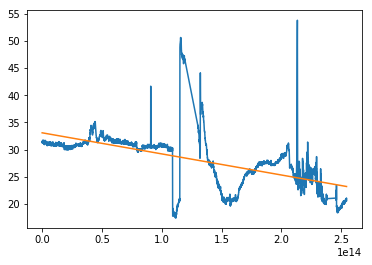

In [13]:
import matplotlib.pyplot as plt
plt.plot(mt,m)
plt.plot(mt,regr.predict(mt))

In [16]:
from datetime import datetime
print(trendStart.value)
zoink = datetime.now().timestamp.astype('float64')
zoink
#nf=zoink.astype('float64')
# -trendStart.value
print(nf)
date = np.array(datetime.now(), dtype=np.datetime64)
fu=date + np.arange(12)
print(fu-nf)

1559779247000000000


AttributeError: 'builtin_function_or_method' object has no attribute 'astype'

In [ ]:
print(datetime.now().timestamp)